# Bandpass integration

The `get_emission` method implemented by any subclass of `Model`, including `Sky`, allows a `numpy` array of frequencies instead of a single frequency value to define a tophat bandpass and optionally a `weights` array of the same length to define a custom weight.
PySM normalizes the `weights` array to unit integral then generates the emission at each of the specified frequencies, it multiplies it by the corresponding weight, and integrates them with the Trapezoidal rule.
Instead of having generating all the maps as PySM 2, PySM 3 keeps in memory just 1 array for the output map and then creates the maps at a specific frequency one at a time and accomulates it properly into the output array.

In [1]:
import pysm
import pysm.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sky = pysm.Sky(nside=128, preset_strings=["d1", "s1"])

In [3]:
map_100GHz_delta = sky.get_emission(100 * u.GHz)

In [4]:
bandpass_frequencies = np.linspace(95, 105, 11) * u.GHz

In [5]:
bandpass_frequencies

<Quantity [ 95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
           105.] GHz>

In [6]:
map_100GHz_tophat = sky.get_emission(bandpass_frequencies)

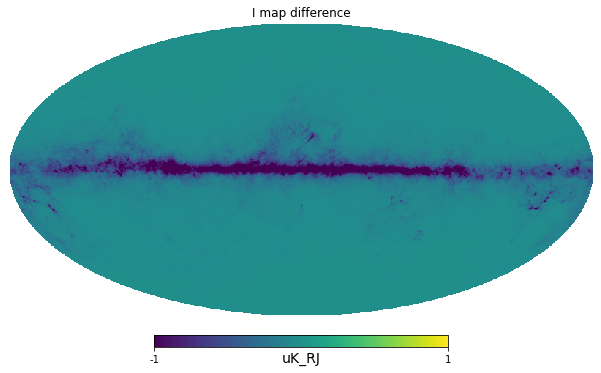

In [7]:
hp.mollview(map_100GHz_delta[0] - map_100GHz_tophat[0], min=-1, max=1, title="I map difference", unit=map_100GHz_tophat.unit)

In [8]:
bandpass_weights = np.array([2,3,5,9,11,11.5,11,9,5,3,2])

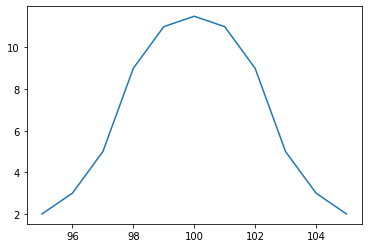

In [9]:
plt.plot(bandpass_frequencies,bandpass_weights);

In [10]:
map_100GHz_bandpass = sky.get_emission(bandpass_frequencies, bandpass_weights)

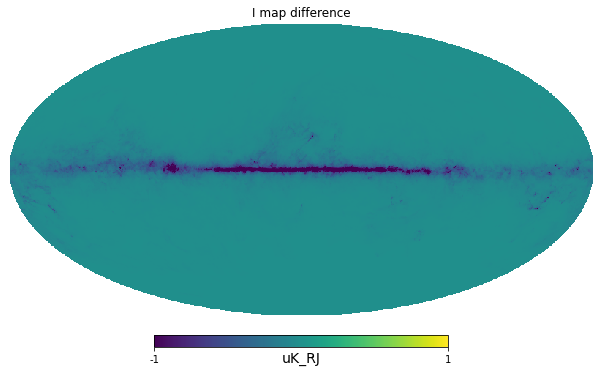

In [11]:
hp.mollview(map_100GHz_bandpass[0] - map_100GHz_tophat[0], min=-1, max=1, title="I map difference", unit=map_100GHz_tophat.unit)